# Assignment-2 : K-Means Clustering_Group-8

### 1. Nikhileswar Duvvuru (301167843)
### 2. Namirabanu Malek (301178112)     

#  Retrieve and load the Olivetti faces dataset

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
faces = fetch_olivetti_faces(shuffle = True,random_state =43)

In [2]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [3]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
images = faces.images
labels = faces.target
data = faces.data


In [5]:
X= pd.DataFrame(data)
y =pd.DataFrame(labels)

In [6]:
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


There are 40 unique target variables to predict

In [7]:

def display_images(images):
    fig, axes = plt.subplots(5, 8, figsize=(18, 9),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='bone')
    plt.suptitle("Unique Images in the dataset:")

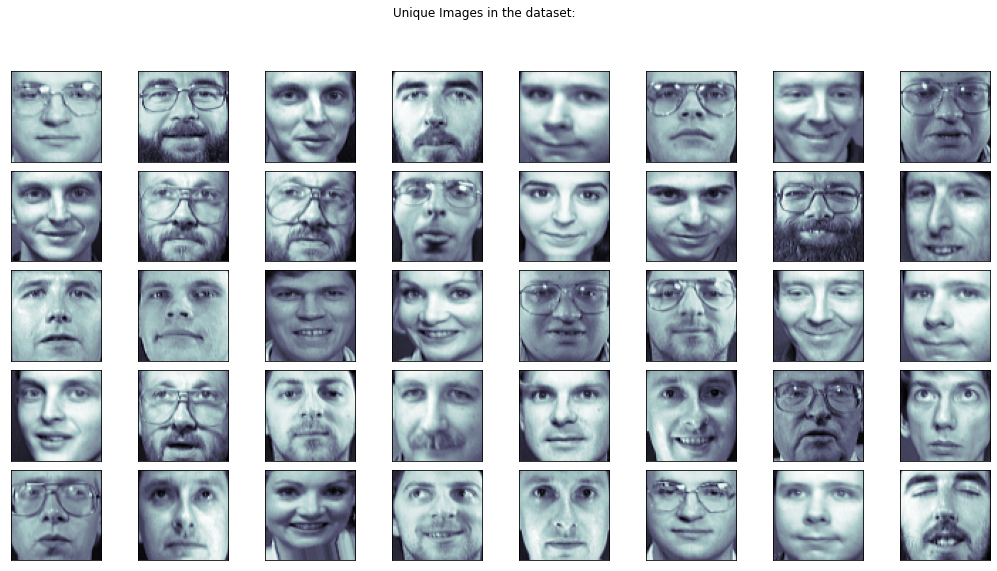

In [8]:
display_images(images)

Checking for Null Values:

In [9]:
print(X.isna().sum().sum())
print(y.isna().sum().sum())

0
0


## Splitting the data using stratified sampling

1.We have used stratify property to have a balanced split for each class.

2.The ideal split for train test would be 80 : 20 or 70:30

3.We have given 80 percent of data to the training set and we have splitted the rest 20 percent to validation and test set which have a balanced split for each class.


In [10]:
from sklearn.model_selection import train_test_split
faces_train, faces_rest, labels_train, labels_rest = train_test_split(X,y, test_size=0.2,stratify=y,random_state=43)

In [11]:
faces_val, faces_test, labels_val, labels_test = train_test_split(faces_rest,labels_rest,stratify=labels_rest,test_size=0.5)

In [12]:
print(faces_train.shape, labels_train.shape)
print(faces_val.shape, labels_val.shape)
print(faces_test.shape, labels_test.shape)

(320, 4096) (320, 1)
(40, 4096) (40, 1)
(40, 4096) (40, 1)


In [13]:
#count for each class in train,test and validation set
def print_count(labels):
    id=[]
    for i in range(40):
        sum = int((labels == i).sum())
        id.append(sum)
    print(id)
    
print_count(labels_train)#train set
print_count(labels_val)#val set 
print_count(labels_test)#test set
    

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


The above counts shows that the data has a balanced split for each class between train, validation and test set 

In [14]:
faces_train

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
278,0.239669,0.367769,0.491736,0.533058,0.524793,0.528926,0.561983,0.582645,0.586777,0.590909,...,0.462810,0.466942,0.578512,0.611570,0.293388,0.148760,0.202479,0.198347,0.198347,0.194215
120,0.433884,0.524793,0.694215,0.764463,0.772727,0.793388,0.814050,0.809917,0.801653,0.805785,...,0.053719,0.057851,0.061983,0.078512,0.090909,0.090909,0.103306,0.119835,0.173554,0.165289
196,0.289256,0.338843,0.417355,0.504132,0.553719,0.561983,0.582645,0.628099,0.669421,0.690083,...,0.541322,0.524793,0.500000,0.487603,0.404959,0.359504,0.367769,0.359504,0.351240,0.363636
139,0.446281,0.495868,0.524793,0.528926,0.524793,0.528926,0.528926,0.537190,0.528926,0.504132,...,0.623967,0.611570,0.611570,0.648760,0.504132,0.438017,0.446281,0.338843,0.466942,0.520661
293,0.466942,0.475207,0.454545,0.491736,0.495868,0.487603,0.570248,0.590909,0.603306,0.628099,...,0.231405,0.297521,0.330579,0.363636,0.491736,0.578512,0.632231,0.669421,0.673554,0.657025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.528926,0.797521,0.826446,0.822314,0.822314,0.818182,0.805785,0.818182,0.801653,0.801653,...,0.371901,0.384298,0.396694,0.309917,0.185950,0.152893,0.107438,0.128099,0.103306,0.103306
207,0.404959,0.454545,0.500000,0.533058,0.570248,0.590909,0.611570,0.628099,0.652893,0.661157,...,0.458678,0.466942,0.479339,0.471074,0.483471,0.772727,0.752066,0.743802,0.731405,0.702479
335,0.185950,0.194215,0.322314,0.524793,0.661157,0.772727,0.822314,0.838843,0.842975,0.842975,...,0.289256,0.285124,0.268595,0.243802,0.239669,0.219008,0.202479,0.190083,0.194215,0.202479
272,0.417355,0.483471,0.528926,0.549587,0.570248,0.557851,0.566116,0.590909,0.619835,0.640496,...,0.185950,0.177686,0.173554,0.169421,0.173554,0.185950,0.173554,0.161157,0.177686,0.169421


## Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

Changing labels from pandas series to 1-D array

In [16]:
labels_train = np.array(labels_train[0])
labels_val = np.array(labels_val[0])
labels_test = np.array(labels_test[0])

In [17]:

clf = LogisticRegression(max_iter=300,solver ='liblinear')


In [18]:
clf.fit(faces_train, labels_train)

LogisticRegression(max_iter=300, solver='liblinear')

In [19]:
kfold=KFold(n_splits=5, random_state=None, shuffle=False)
crossValidation = cross_val_score(clf,faces_train, labels_train, cv=kfold)
print("Cross validaiton: ",crossValidation)
print("\nMean: ",crossValidation.mean())

Cross validaiton:  [0.953125 0.90625  0.953125 0.875    0.9375  ]

Mean:  0.925


In [20]:
from sklearn.metrics import confusion_matrix,silhouette_score,accuracy_score
labels_pred=clf.predict(faces_val)
print('Accuracy: {}'.format(accuracy_score(labels_val, labels_pred)))
print("Confusion matrix: ",confusion_matrix(labels_val, labels_pred))


Accuracy: 1.0
Confusion matrix:  [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [21]:
labels_test_pred=clf.predict(faces_test)
print('Accuracy: {}'.format(accuracy_score(labels_test, labels_test_pred)))
print("--------Confusion matrix:--------",confusion_matrix(labels_test, labels_test_pred))


Accuracy: 0.95
--------Confusion matrix:-------- [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


## Using K-Means to reduce the dimensionality of the set: 

### Use the silhouette score approach to choose the number of clusters

In [22]:
range_of_clusters = range(50,150,5) # starting range from 50
kmeans_k=[]
inertias=[]
#silhouette_scores=[]

for i in range_of_clusters:
    k = KMeans(n_clusters=i, random_state=43).fit(faces_train)
    kmeans_k.append(k)

for i in kmeans_k:
    inertia = i.inertia_
    inertias.append(inertia)



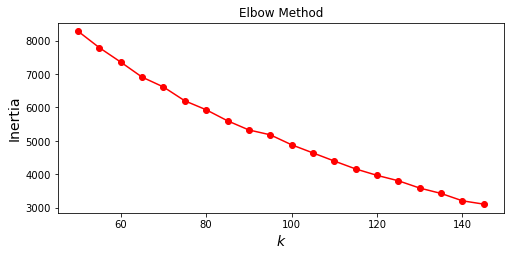

In [23]:


silhouette_scores = [silhouette_score(faces_train, model.labels_)
                     for model in kmeans_k]
#finding cluster with max score
idx = np.argmax(silhouette_scores)
score = silhouette_scores[idx]
k= range_of_clusters[idx]

plt.figure(figsize=(8, 3.5))
plt.plot(range_of_clusters, inertias, "ro-")
plt.title("Elbow Method")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()


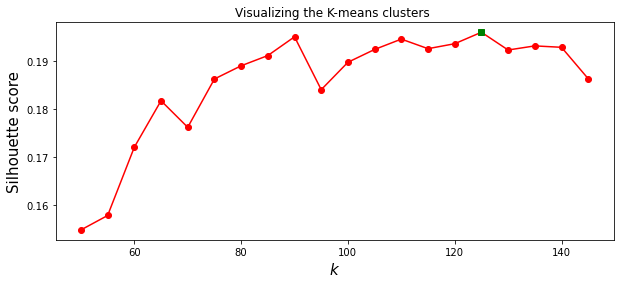

In [24]:

plt.figure(figsize=(10, 4))
plt.plot(range_of_clusters, silhouette_scores, "ro-")
plt.title("Visualizing the K-means clusters ")
plt.plot(k, score, "gs")
plt.xlabel("$k$", fontsize=15)
plt.ylabel("Silhouette score", fontsize=15)
plt.show()

From the above graph,

The value of 90 and 125 for n_clusters looks to be the optimal one. The silhouette score for each cluster is maximum in the given range.

So, lets visualize more with those cluster with 125 since it has maximum score

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=125,
                                      random_state=43))

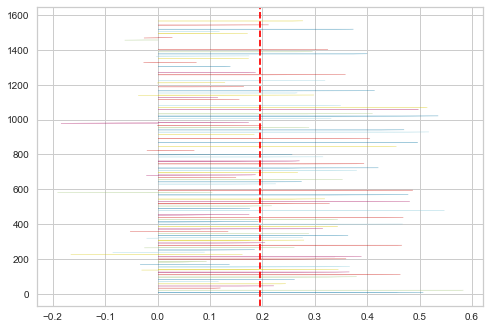

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer
fig = plt.plot()
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=43)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(faces_train)

Visualizing the plots with clusters = 2,3,4 and 5

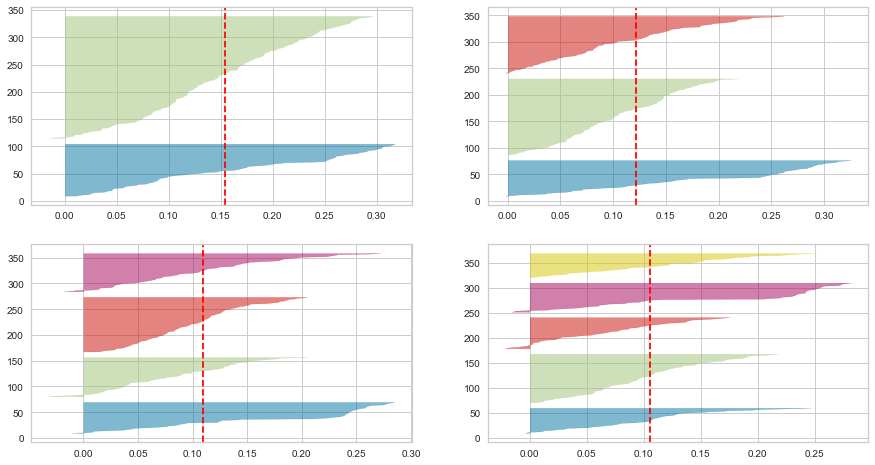

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=43)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(faces_train)

The scores for clusters 2,3,4 and 5 has scores less than with clusters = 125


In [32]:
print(k)#cluster with max silhouette score

125


In [33]:
km = KMeans(n_clusters=k, random_state=43)
#
# Fit the KMeans with clusters = 125
#
faces_train_kmean = km.fit_predict(faces_train)


## training the classifier with K-means clusters =125

In [34]:
from sklearn.pipeline import Pipeline

clf_kmean_logistic = Pipeline([
    ("kmeans", KMeans(n_clusters=k)),
    ("Logistic Regression", LogisticRegression(max_iter=300,solver ='liblinear'))
])
    
crossValidation_kmean = cross_val_score(clf_kmean_logistic, faces_train, labels_train, cv=kfold)
print("Cross validaiton: ",crossValidation_kmean)
print("\nMean: ",crossValidation_kmean.mean())

Cross validaiton:  [0.90625  0.921875 0.953125 0.828125 0.9375  ]

Mean:  0.909375


In [35]:
clf_kmean_logistic.fit(faces_train, labels_train)

labels_kmean_pred=clf_kmean_logistic.predict(faces_val)
print('Accuracy: {}'.format(accuracy_score(labels_val, labels_kmean_pred)))
print("Confusion matrix: ",confusion_matrix(labels_val, labels_kmean_pred))

Accuracy: 0.9
Confusion matrix:  [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [36]:
labels_kmeans_test_pred=clf_kmean_logistic.predict(faces_test)
print('Accuracy: {}'.format(accuracy_score(labels_test, labels_kmeans_test_pred)))
print("--------Confusion matrix:--------",confusion_matrix(labels_test, labels_kmeans_test_pred))

Accuracy: 0.925
--------Confusion matrix:-------- [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


The prediction is accurate when trained without reducing dimensions which is nearly in the range of 0.95 to 1, however while reducing clusters prediction is good with 0.05 percent difference which can be ignored.  